**DAGILIM GRAFIKLERI**

*Barplot (Sütun grafiği)*

Elimizdeki kategorik değişkenleri görselleştirmek için kullanılır.

**Veri Seti Hikayesi**

price (fiyat): 326-18,823 dolar arasında

carat (ağırlık): 0.2-5.01 arasında

cut (kalite): Fair, Good, Very Good, Premium, Ideal

color (renk): J'den (en kötü) D'ye (en iyi)

clarity (berraklık): I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF (en iyi)

x: uzunluk 0-10.74 mm

y: genişlik 0-58.9 mm

z: derinlik 0-31.8 mm

depth: toplam derinlik yüzdesi = 2*z/(x+y) = %43-79 arası

table: elmasın en geniş noktasına göre genişliği %43-95 arası

Hikayesini anlayıp analiz etmeliyiz kafamızda

In [3]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


Veri setine hızlı bakış

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21681 entries, 0 to 21680
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    21681 non-null  float64 
 1   cut      21681 non-null  category
 2   color    21681 non-null  category
 3   clarity  21681 non-null  category
 4   depth    21681 non-null  float64 
 5   table    21680 non-null  float64 
 6   price    21680 non-null  float64 
 7   x        21680 non-null  float64 
 8   y        21680 non-null  float64 
 9   z        21680 non-null  float64 
dtypes: category(3), float64(7)
memory usage: 1.2 MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,21681.0,0.982163,0.318039,0.2,0.86,1.01,1.14,3.01
depth,21681.0,61.818136,1.542659,43.0,61.00,61.90,62.70,71.80
table,21680.0,57.760078,2.222104,43.0,56.00,58.00,59.00,70.00
price,21680.0,4815.625692,2241.183828,326.0,3438.00,4639.00,6279.00,9781.00
x,21680.0,6.273399,0.793123,0.0,6.04,6.42,6.72,9.23
y,21680.0,6.272744,0.781687,0.0,6.04,6.42,6.71,9.10
z,21680.0,3.875911,0.495710,0.0,3.73,3.98,4.14,5.97


In [6]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


In [7]:
cat_df = df.select_dtypes(include=["category"])

In [8]:
cat_df["color"].value_counts()

color
G    4353
H    3918
F    3739
E    3319
D    2458
I    2449
J    1445
Name: count, dtype: int64

In [9]:
cat_df.clarity.value_counts()

clarity
SI1     5989
SI2     5251
VS2     4685
VS1     3068
VVS2    1324
VVS1     680
I1       438
IF       246
Name: count, dtype: int64

In [10]:
cat_df.cut.value_counts()

cut
Ideal        7112
Premium      5995
Very Good    5312
Good         2418
Fair          844
Name: count, dtype: int64

In [11]:
# goruldugu gibi bu kategorik degiskenlerin ordinal turde oldugunu goruyoruz.

In [12]:
from pandas.api.types import CategoricalDtype

In [13]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [15]:
df.cut = df.cut.astype(CategoricalDtype(ordered=True)) # Bu belirttigimiz degiskenin kategorik oldugunu bilgisayara belirtmemize olanak taniyor.

In [17]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

In [18]:
# ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair'] goruldugu gibi burada siralamis ama yanlis siralamis.

In [19]:
cut_categories = ["Fair", "Good", "Very Good", "Premium", "Ideal"]

In [ ]:
df.cut = df.cut.astype(CategoricalDtype(categories=cut_categories, ordered=True)) #################################

In [21]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

In [22]:
# Barplot

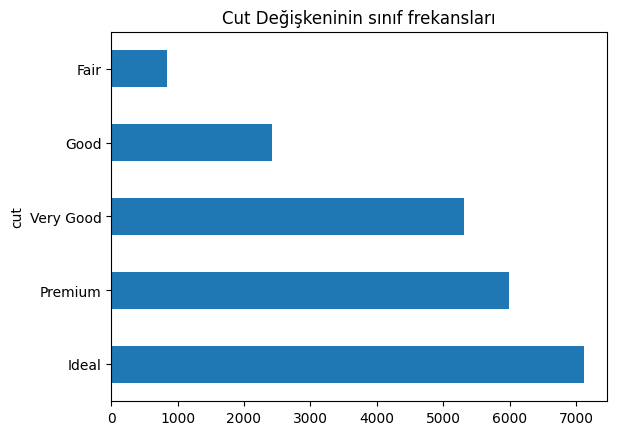

In [24]:
df["cut"].value_counts().plot.barh().set_title("Cut Değişkeninin sınıf frekansları");

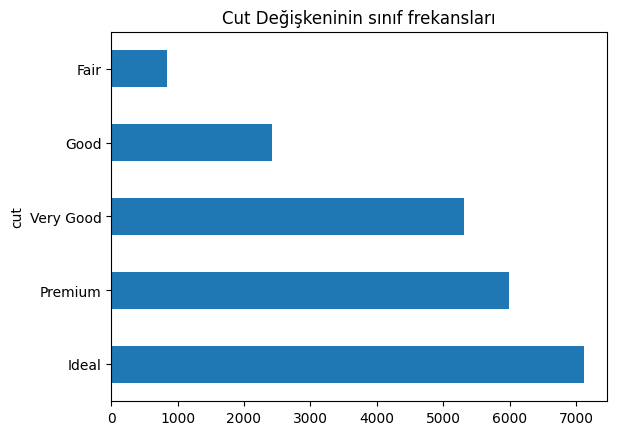

In [25]:
(df["cut"]
 .value_counts()
 .plot.barh()
 .set_title("Cut Değişkeninin sınıf frekansları"));

# boyle de gosterilebiliyor.

<Axes: xlabel='cut', ylabel='None'>

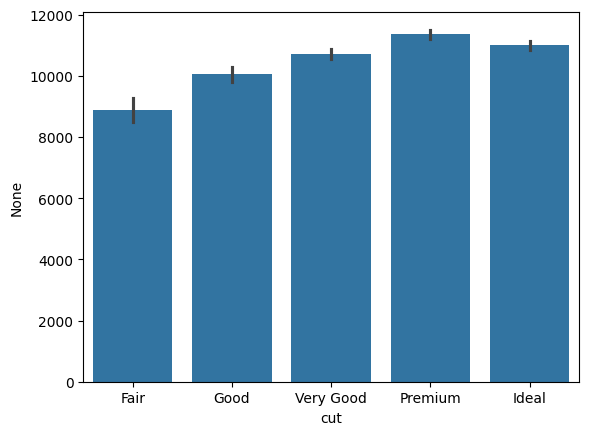

In [29]:
sns.barplot(x="cut", y=df.cut.index, data=df)
# seaborn ile gosterimi